In [0]:
from google.colab import drive
drive.mount('./drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./drive


In [0]:
!pip install subword-nmt

In [0]:
!subword-nmt learn-bpe -s 16000 < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_train.ja' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_codes_ja.txt'

In [0]:
!subword-nmt apply-bpe -c 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_codes_ja.txt' < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_train.ja' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_train.ja'
!subword-nmt apply-bpe -c 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_codes_ja.txt' < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_dev.ja' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_dev.ja'
!subword-nmt apply-bpe -c 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_codes_ja.txt' < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_test.ja' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_test.ja'

In [0]:
!subword-nmt learn-bpe -s 16000 < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_train.en' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_codes_en.txt'

In [0]:
!subword-nmt apply-bpe -c 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_codes_en.txt' < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_train.en' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_train.en'
!subword-nmt apply-bpe -c 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_codes_en.txt' < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_dev.en' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_dev.en'
!subword-nmt apply-bpe -c 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_codes_en.txt' < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_test.en' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_test.en'

In [0]:
!pip install fairseq

     |████████████████████████████████| 307kB 2.8MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
  Created wheel for fairseq: filename=fairseq-0.9.0-cp36-cp36m-linux_x86_64.whl size=2035359 sha256=74b090b702770b3b1b36dd32109064f910bf7acb1c4c4951f5959146c78e13c6
  Stored in directory: /root/.cache/pip/wheels/37/3e/1b/0fa30695dcba41e4b0088067fa40f3328d1e8ee78c22cd4766
Successfully built fairseq


In [0]:
!fairseq-preprocess -s ja -t en \
  --trainpref 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_train' \
  --validpref 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_dev' \
  --destdir 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_data-bin' \
  --workers 20

In [0]:
! fairseq-train 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_data-bin' \
  --save-dir 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_checkpoints' \
  --fp16 \
  --arch transformer --share-decoder-input-output-embed \
  --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
  --optimizer adam --clip-norm 1.0 \
  --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
  --weight-decay 1e-4 \
  --dropout 0.2 \
  --max-epoch 5 \
  --max-tokens 8000

Namespace(activation_dropout=0.0, activation_fn='relu', adam_betas='(0.9, 0.999)', adam_eps=1e-08, adaptive_input=False, adaptive_softmax_cutoff=None, adaptive_softmax_dropout=0, arch='transformer', attention_dropout=0.0, best_checkpoint_metric='loss', bpe=None, bucket_cap_mb=25, clip_norm=1.0, cpu=False, criterion='label_smoothed_cross_entropy', cross_self_attention=False, curriculum=0, data='drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_data-bin', dataset_impl=None, ddp_backend='c10d', decoder_attention_heads=8, decoder_embed_dim=512, decoder_embed_path=None, decoder_ffn_embed_dim=2048, decoder_input_dim=512, decoder_layerdrop=0, decoder_layers=6, decoder_layers_to_keep=None, decoder_learned_pos=False, decoder_normalize_before=False, decoder_output_dim=512, device_id=0, disable_validation=False, distributed_backend='nccl', distributed_init_method=None, distributed_no_spawn=False, distributed_port=-1, distributed_rank=0, distributed_world_size=1, dropout=0.2, 

In [0]:
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp

In [0]:
import MeCab

sentence = input('enter sentence: ')

with open('input.txt', mode='w') as file:
  m = MeCab.Tagger('-Owakati -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
  file.write(m.parse(sentence))

enter sentence: 晩年に希玄という異称も用いた。


In [0]:
!echo `mecab-config --dicdir` '/mecab-ipadic-neologd'

/usr/lib/x86_64-linux-gnu/mecab/dic /mecab-ipadic-neologd


In [0]:
!subword-nmt apply-bpe -c 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_codes_ja.txt' < input.txt > input_subword.txt

In [0]:
!fairseq-interactive --path 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_checkpoints/checkpoint5.pt' 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_data-bin' < input_subword.txt | grep '^H' | cut -f 3 | sed -r 's/(@@ )|(@@ ?$)//g' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_output.txt'

/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


In [0]:
!fairseq-interactive --path 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_checkpoints/checkpoint5.pt' 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_data-bin' < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_test.ja' | grep '^H' | cut -f 3 | sed -r 's/(@@ )|(@@ ?$)//g' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_output_test.txt'

/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


In [0]:
!fairseq-score --sys 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_output_test.txt' --ref 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_test.en'

Namespace(ignore_case=False, order=4, ref='drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_test.en', sacrebleu=False, sentence_bleu=False, sys='drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_output_test.txt')
BLEU4 = 0.80, 29.4/4.8/1.2/0.5 (BP=0.267, ratio=0.431, syslen=11463, reflen=26584)


In [6]:
%%bash
for i in 1 10 20 30 40 50 60 70 80 90 100
do
fairseq-interactive --path 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_checkpoints/checkpoint5.pt' --beam $i 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_data-bin' < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/95_result_test.ja' | grep '^H' | cut -f 3 | sed -r 's/(@@ )|(@@ ?$)//g' > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/'95_result_output_$i.txt
done

/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
/pytorch/aten/sr

In [0]:
%%bash
for i in 1 10 20 30 40 50 60 70 80 90 100
do
fairseq-score --sys 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/'95_result_output_$i.txt --ref 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_test.en' > score_$i.txt
done

In [2]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 2.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=10e088511ad77e65b02475bcce99dc3a0fb7bc3fcb8e42d924cba3f9b8679531
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


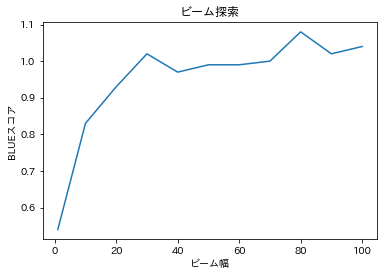

In [1]:
import re
import matplotlib.pyplot as plt
import japanize_matplotlib

x = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = []

for i in x:
  with open('score_{0}.txt'.format(i)) as file:
    blue = file.readlines()[1]
    blue = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', blue)
    y.append(float(blue.group()))
    
plt.plot(x, y)
plt.title('ビーム探索')
plt.xlabel('ビーム幅')
plt.ylabel('BLUEスコア')
plt.show()